## Goal
The goal of running a KNN clustering of counties is to identify counties that are 'similar'. The selected county and their nearest neighbors will then be grouped into either having high or low masking rate. Here we perform KNN based on populatioin, median income, Gini index, percent of people who lived in the area last year, and education(percentage of people havinf undergraduate and graduate degree. By clustering these counties we strive to reduce confounding variables that may influence covid mortality by controlling for these factors that may otherwise be correlated with covid outcome.  

In [72]:
# Importing the libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from bioinfokit.visuz import cluster
from sklearn.neighbors import NearestNeighbors

### PCA

In [73]:
#df = pd.read_excel('county_neighbor.xlsx', dtype=object,index_col='County_Name')
df = pd.read_csv('KNN_in_v1.csv', dtype=object)

# change the options below to get different KNN results
#df1=df.drop(columns=['Unnamed: 0', 'County_Name','FIPS','Population'])

# no ethnicity
#df1=df.drop(columns=['Unnamed: 0', 'County_Name','FIPS','Population','White','Black','Asian','Native_American','Multiracial'])

# no income info
#df1=df.drop(columns=['Unnamed: 0', 'County_Name','FIPS','Population','Gini Index','Median Income'])

# no education info
#df1=df.drop(columns=['Unnamed: 0', 'County_Name','FIPS','Population','% Undergrads','% with Masters Degree'])

# no political info
df1=df.drop(columns=['Unnamed: 0', 'County_Name','FIPS','% of Voters Voting Republican in 2020 General Election'])

df1

,Population,Median Income,Gini Index,% Lived in Area Last Year,% Undergrads,% with Masters Degree,% in Armed Forces,TOT_POP,White,Black,Asian,Native_American,Multiracial,male_percentage
0,910551,41402,0.4,0.8,0.07,0.08,0,967201,0.2703626236945578,0.6428239838461706,0.04412423064078718,0.014870745584423507,0.027818416234060967,1.0
1,30791,25818,0.46,0.82,0.04,0.04,0.02,33458,0.18130193077888695,0.7755693705541276,0.011297746428357942,0.006425966883854385,0.02540498535477315,1.0
2,602274,31089,0.51,0.83,0.06,0.08,0,585708,0.31881244579210116,0.6250230490278432,0.027611028020788516,0.005659816837058739,0.022893660322208336,1.0
3,1629153,52409,0.6,0.88,0.05,0.15,0,1694251,0.6468734561762101,0.1767559824370769,0.12772310596245776,0.013963102279414325,0.034684353144840994,1.0
4,874784,54549,0.51,0.89,0.05,0.13,0,873965,0.5233539100536063,0.0555662984215615,0.36190579714290616,0.011991326883799695,0.04718266749812636,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,1447,20811,0.45,0.82,0.03,0.04,0,1116,0.9614695340501792,0.021505376344086023,0.0017921146953405018,0.008960573476702509,0.0062724014336917565,1.0
3139,1051,26464,0.49,0.82,0.03,0.02,0,1173,0.9812446717817562,0.004262574595055414,0.0008525149190110827,0.005115089514066497,0.008525149190110827,1.0
3140,653,35341,0.38,0.78,0,0.06,0,631,0.9477020602218701,0.009508716323296355,0.001584786053882726,0.00792393026941363,0.03328050713153724,1.0
3141,279,31250,0.49,1.06,0.01,0.01,0,265,0.9358490566037736,0.022641509433962263,0.0,0.01509433962264151,0.026415094339622643,1.0


In [74]:
# scaling
scaler = StandardScaler()
scaled_df=df1.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
#target = df['Niche'].to_numpy()
# PCA
pca=PCA()
pca_out = pca.fit(scaled_df)
explained_variance=pca_out.explained_variance_ratio_
X=PCA(n_components=8).fit_transform(scaled_df)

# lodings
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df1.columns.values
loadings_df = loadings_df.set_index('variable')

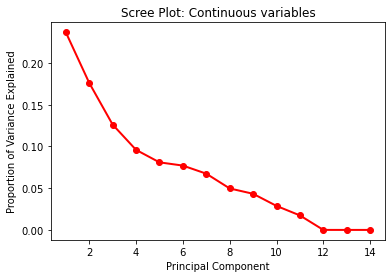

In [75]:
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot: Continuous variables')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.savefig('Scree Plot_Continuous_variables.png',format='png')
plt.show()

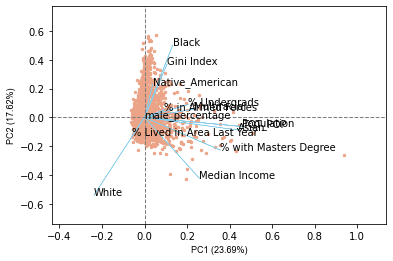

In [76]:
# biplot
pca_scores = pca.fit_transform(scaled_df)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df1.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), show=True)


In [77]:
sum(explained_variance[:8])

0.9105566357266941

### KNN

In [78]:
def get_neigh(county_name, num_neighbor):
    i=int(df.index[df['County_Name'] == county_name].tolist()[0])
    model_knn= NearestNeighbors(n_neighbors=num_neighbor)
    model_knn.fit(X)
    
    ls=model_knn.kneighbors([X[i]], num_neighbor,return_distance=False)
    tmp=[]
    for each in ls[0]:
        tmp.append(df.loc[[each]]['County_Name'].item())
        #print(df.loc[[each]]['County_Name'].item())
    return(tmp)


In [79]:
get_neigh('Fulton County, Georgia', 20)

['Fulton County, Georgia',
 'Essex County, New Jersey',
 'Mecklenburg County, North Carolina',
 'DeKalb County, Georgia',
 'St. Louis County, Missouri',
 'Westchester County, New York',
 'Suffolk County, Massachusetts',
 'District of Columbia, District of Columbia',
 'Fairfield County, Connecticut',
 'Hudson County, New Jersey',
 'Baltimore County, Maryland',
 'Cobb County, Georgia',
 'Cuyahoga County, Ohio',
 'Oakland County, Michigan',
 'Hartford County, Connecticut',
 'Hennepin County, Minnesota',
 'Mercer County, New Jersey',
 'Wake County, North Carolina',
 'Shelby County, Tennessee',
 'Baltimore city, Maryland']

In [80]:
df['neighbors'] = df.apply(lambda row: get_neigh(row.County_Name, 20), axis = 1)

In [81]:
#df.to_excel('KNN_neighbors_out.xlsx')
#df.to_excel('KNN_no_ethnicity.xlsx')
#df.to_excel('KNN_wo_income.xlsx')
#df.to_excel('KNN_wo_education.xlsx')
df.to_excel('KNN_wo_political.xlsx')